# Random Forest Classification

In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

## Preparing the Data

In [2]:
# Getting the data from the urls
url_red_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

red_wine_data = pd.read_csv(url_red_wine, sep = ';');
white_wine_data = pd.read_csv(url_white_wine, sep = ';');

In [3]:
# Adding the good quality column to the data
red_wine_data["good quality"] = red_wine_data.apply(lambda x: x["quality"] >= 7, axis=1)
white_wine_data["good quality"] = white_wine_data.apply(lambda x: x["quality"] >= 7, axis=1)

In [5]:
# Shuffling and splitting the data into measurements and labels, and training and testing data
red_wine_measurements = red_wine_data.drop(["quality", "good quality"], axis = 1)
red_wine_labels = red_wine_data["good quality"]
train_red_wine_measurements, test_red_wine_measurements, train_red_wine_labels, test_red_wine_labels = \
    train_test_split(red_wine_measurements, red_wine_labels, test_size = 0.25)

white_wine_measurements = white_wine_data.drop(["quality", "good quality"], axis = 1)
white_wine_labels = white_wine_data["good quality"]
train_white_wine_measurements, test_white_wine_measurements, train_white_wine_labels, test_white_wine_labels = \
    train_test_split(white_wine_measurements, white_wine_labels, test_size = 0.25)

## Decision Tree Classifier

First, we talk about decision trees. Decision trees are a type of supervised learning model used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. This results in a very intuitive model that is easy to interpret and explain since it mimics human level thinking.

The decision tree is a flowchart-like structure where an internal node represents a feature or an attribute, the branch represents a decision rule, and each leaf node represents the outcome. The top node is called the root node, and the nodes that do not have any children are called leaf nodes. The maximum depth of the tree is the length of the longest path from the root node to a leaf node.

The basic idea of how a decision tree works is as follows:
1. Select the best attribute using the attribute selection measure to split the records. ASM is a heuristic for selecting the split and they include:
    - Information Gain
    - Gain Ratio
    - Gini Index
2. Make that attribute a decision node and break the dataset into smaller subsets.
3. Start tree building by repeating this process recursively for each child until one of the conditions will match:
    - All the tuples belong to the same attribute value.
    - There are no more remaining attributes.
    - There are no more instances.

A decision tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as with a neural network. Its training time is faster compared to the neural network algorithm.

However, decision trees are prone to overfitting, which means that they are too complex and do not generalize well to new data. This is where random forests come in.

In [54]:
# Decision Tree Classifier
# https://www.datacamp.com/tutorial/decision-tree-classification-python

dt_red = DecisionTreeClassifier(criterion = "gini", max_depth = None) # default values
dt_red.fit(train_red_wine_measurements, train_red_wine_labels)
dt_red_predictions = dt_red.predict(test_red_wine_measurements)

dt_white = DecisionTreeClassifier(criterion = "gini", max_depth = None) # default values
dt_white.fit(train_white_wine_measurements, train_white_wine_labels)
dt_white_predictions = dt_white.predict(test_white_wine_measurements)

Decision Tree (Red Wine)
Accuracy:  0.875
Precision:  0.5138888888888888
Recall:  0.7115384615384616


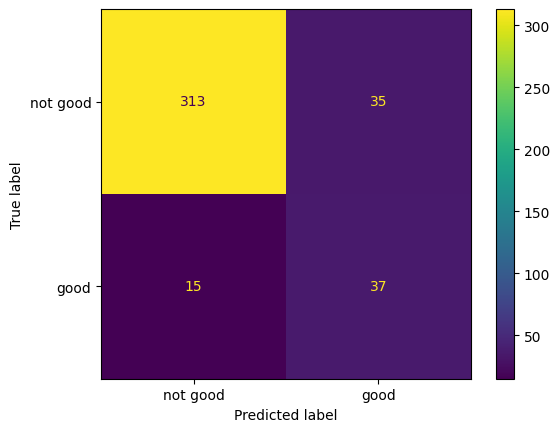

In [64]:
dt_cm_red = confusion_matrix(test_red_wine_labels, dt_red_predictions)
ConfusionMatrixDisplay(dt_cm_red, display_labels = ["not good", "good"]).plot()

dt_accuracy_red = accuracy_score(test_red_wine_labels, dt_red_predictions)
dt_precision_red = precision_score(test_red_wine_labels, dt_red_predictions)
dt_recall_red = recall_score(test_red_wine_labels, dt_red_predictions)

print("Decision Tree (Red Wine)")
print("Accuracy: ", dt_accuracy_red)
print("Precision: ", dt_precision_red)
print("Recall: ", dt_recall_red)

Decision Tree (White Wine)
Accuracy:  0.8269387755102041
Precision:  0.6186770428015564
Recall:  0.5824175824175825


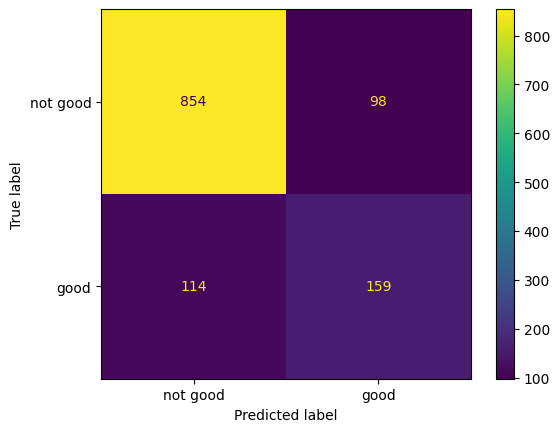

In [63]:
dt_cm_white = confusion_matrix(test_white_wine_labels, dt_white_predictions)
ConfusionMatrixDisplay(dt_cm_white, display_labels = ["not good", "good"]).plot()

dt_accuracy_white = accuracy_score(test_white_wine_labels, dt_white_predictions)
dt_precision_white = precision_score(test_white_wine_labels, dt_white_predictions)
dt_recall_white = recall_score(test_white_wine_labels, dt_white_predictions)

print("Decision Tree (White Wine)")
print("Accuracy: ", dt_accuracy_white)
print("Precision: ", dt_precision_white)
print("Recall: ", dt_recall_white)

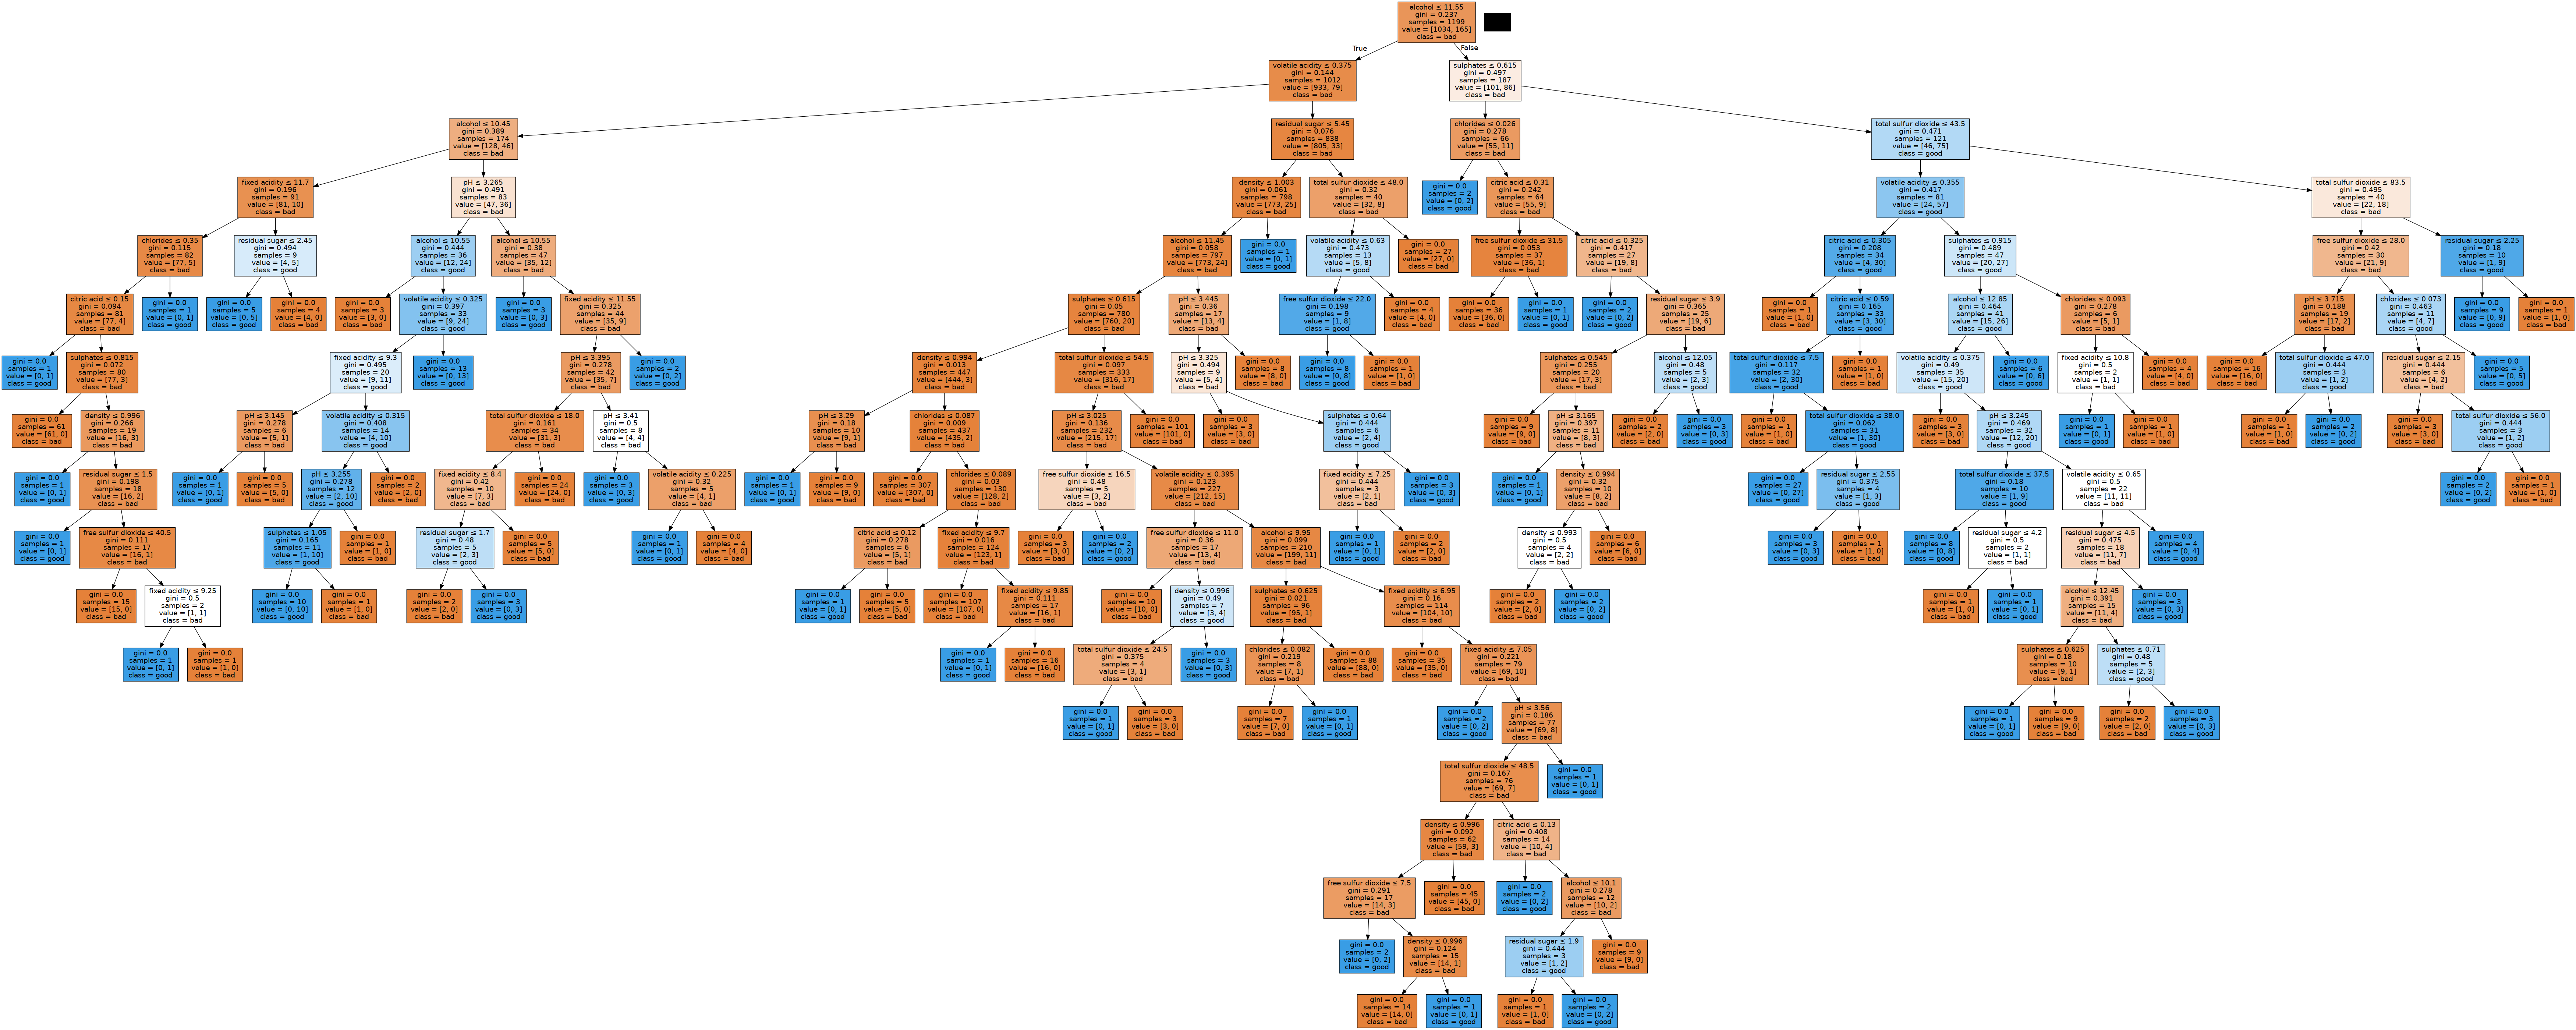

In [34]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = export_graphviz(dt_red,
                           filled = True,
                           special_characters = True,
                           feature_names = red_wine_measurements.columns,
                           class_names = ["bad", "good"])
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("dt_red.png")
Image(graph.create_png())


## Random Forest Classifier

In [50]:
# Random Forest Classifier
# https://www.datacamp.com/tutorial/random-forests-classifier-python

rf_red = RandomForestClassifier(n_estimators = 100,  criterion = "gini", max_depth = None) # default values
rf_red.fit(train_red_wine_measurements, train_red_wine_labels)
rf_red_predictions = rf_red.predict(test_red_wine_measurements)

rf_white = RandomForestClassifier(n_estimators = 100,  criterion = "gini", max_depth = None) # default values
rf_white.fit(train_white_wine_measurements, train_white_wine_labels)
rf_white_predictions = rf_white.predict(test_white_wine_measurements)

Random Forest (Red Wine)
Accuracy: 0.92
Precision: 0.7777777777777778
Recall: 0.5384615384615384


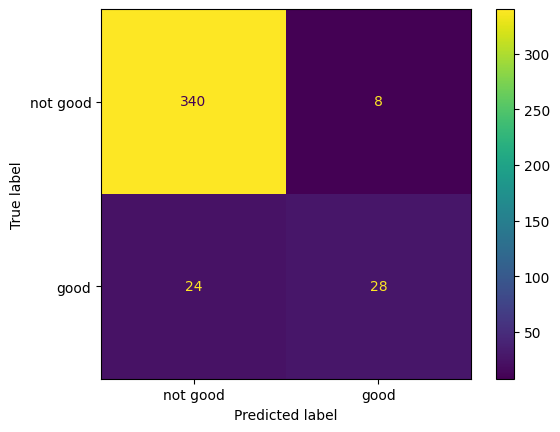

In [65]:
rf_cm_red = confusion_matrix(test_red_wine_labels, rf_red_predictions)
ConfusionMatrixDisplay(rf_cm_red, display_labels = ["not good", "good"]).plot()

rf_accuracy_red = accuracy_score(test_red_wine_labels, rf_red_predictions)
rf_precision_red = precision_score(test_red_wine_labels, rf_red_predictions)
rf_recall_red = recall_score(test_red_wine_labels, rf_red_predictions)

print("Random Forest (Red Wine)")
print("Accuracy:", rf_accuracy_red)
print("Precision:", rf_precision_red)
print("Recall:", rf_recall_red)

Random Forest (White Wine)
Accuracy: 0.8734693877551021
Precision: 0.8314606741573034
Recall: 0.5421245421245421


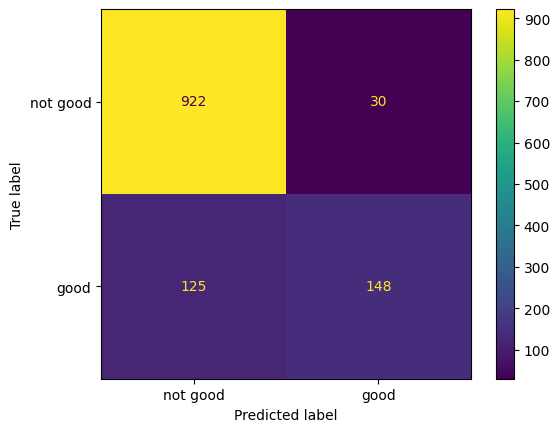

In [66]:
rf_cm_white = confusion_matrix(test_white_wine_labels, rf_white_predictions)
ConfusionMatrixDisplay(rf_cm_white, display_labels = ["not good", "good"]).plot()

rf_accuracy_white = accuracy_score(test_white_wine_labels, rf_white_predictions)
rf_precision_white = precision_score(test_white_wine_labels, rf_white_predictions)
rf_recall_white = recall_score(test_white_wine_labels, rf_white_predictions)

print("Random Forest (White Wine)")
print("Accuracy:", rf_accuracy_white)
print("Precision:", rf_precision_white)
print("Recall:", rf_recall_white)

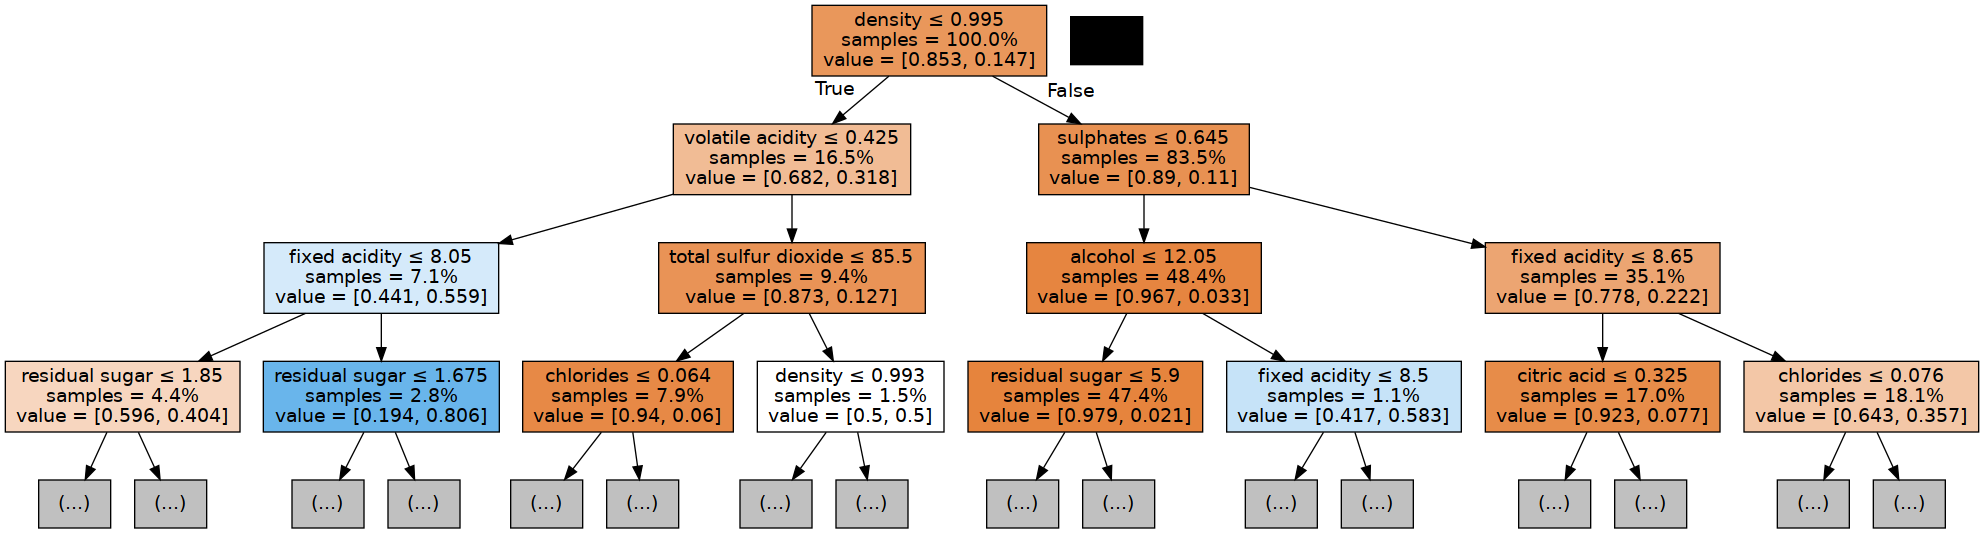

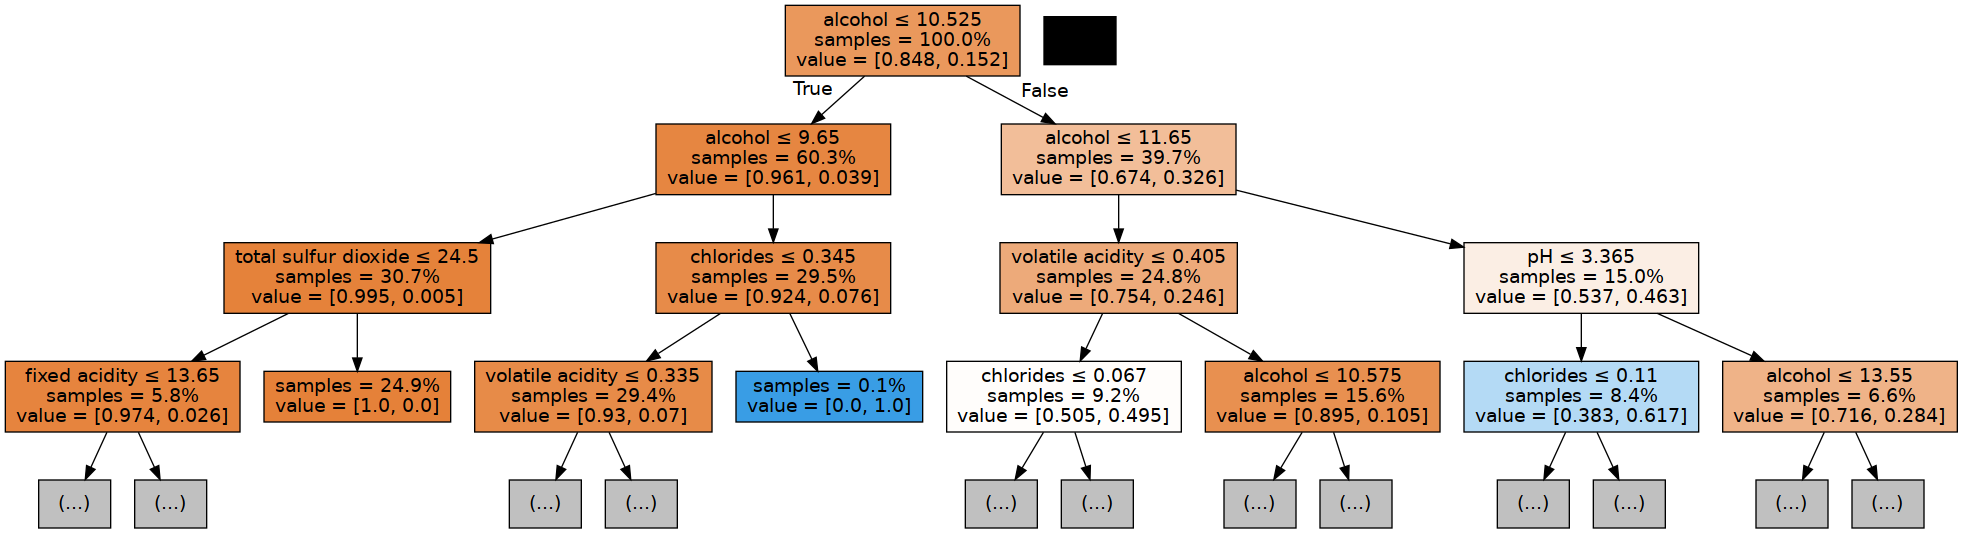

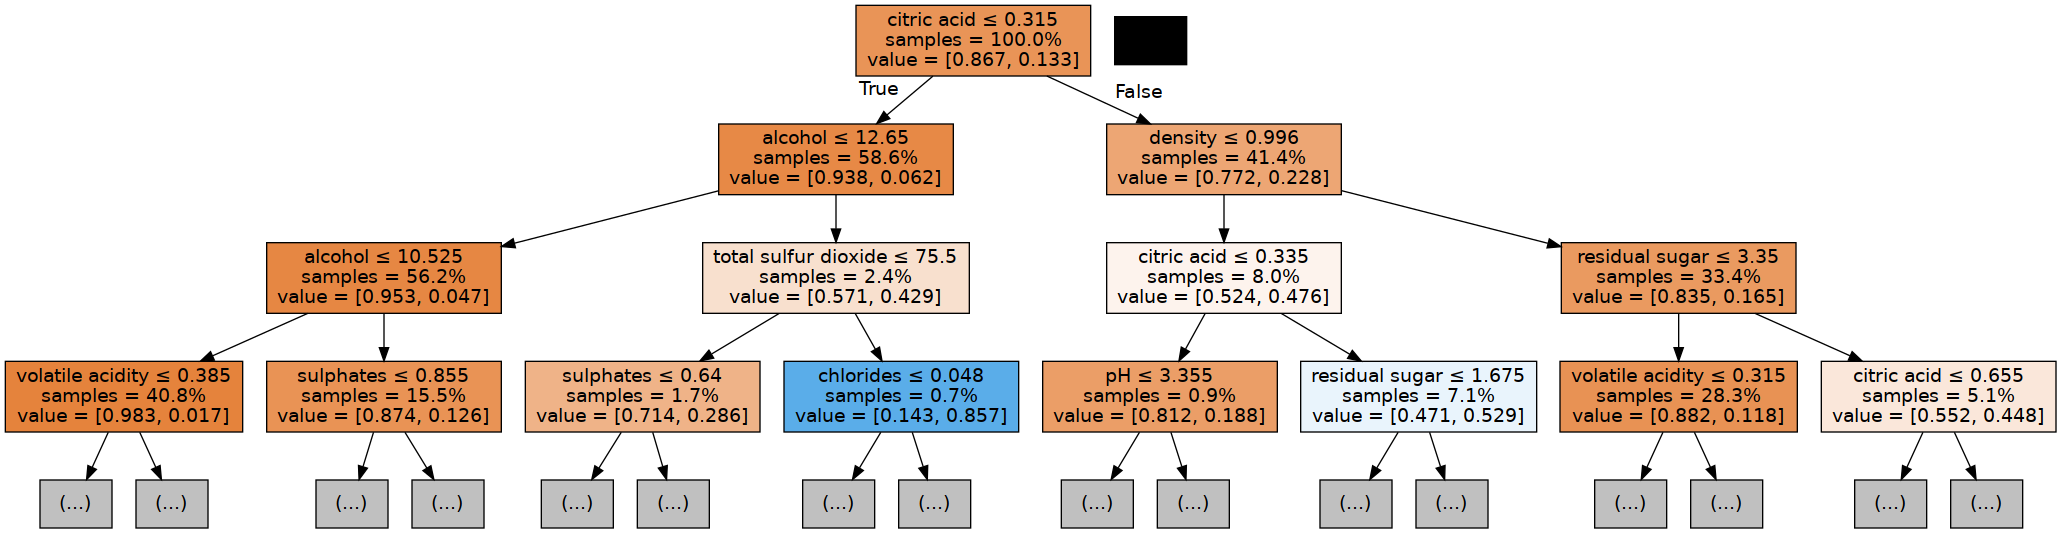

In [32]:
for i in range(3):
    tree = rf_red.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names = red_wine_data.columns[:-2],   
                               filled = True,
                               special_characters = True,  
                               max_depth = 2,
                               impurity = False, 
                               proportion = True)
    graph = pydotplus.graph_from_dot_data(dot_data)  
    # graph.write_png("name.png")
    display(Image(graph.create_png()))